In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data_dir='data/train/'
validation_data_dir='data/test/'

In [3]:
#Train
class_names0 = os.listdir(train_data_dir)
class_names = sorted(class_names0)
print(class_names)
num_class = len(class_names)
image_files = [[os.path.join(train_data_dir, class_name, x) 
               for x in os.listdir(os.path.join(train_data_dir, class_name))] 
               for class_name in class_names]

image_file_list = []
image_label_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [4]:
classes=os.listdir(train_data_dir)
class_count=len(classes)
for klass in classes:
    classpath=os.path.join(train_data_dir, klass)
    file_count=len(os.listdir(classpath))
    print ('klass:- ' , klass, '   samples:- ', file_count)

klass:-  angry    samples:-  3995
klass:-  disgust    samples:-  436
klass:-  fear    samples:-  4097
klass:-  happy    samples:-  7215
klass:-  neutral    samples:-  4965
klass:-  sad    samples:-  4830
klass:-  surprise    samples:-  3171


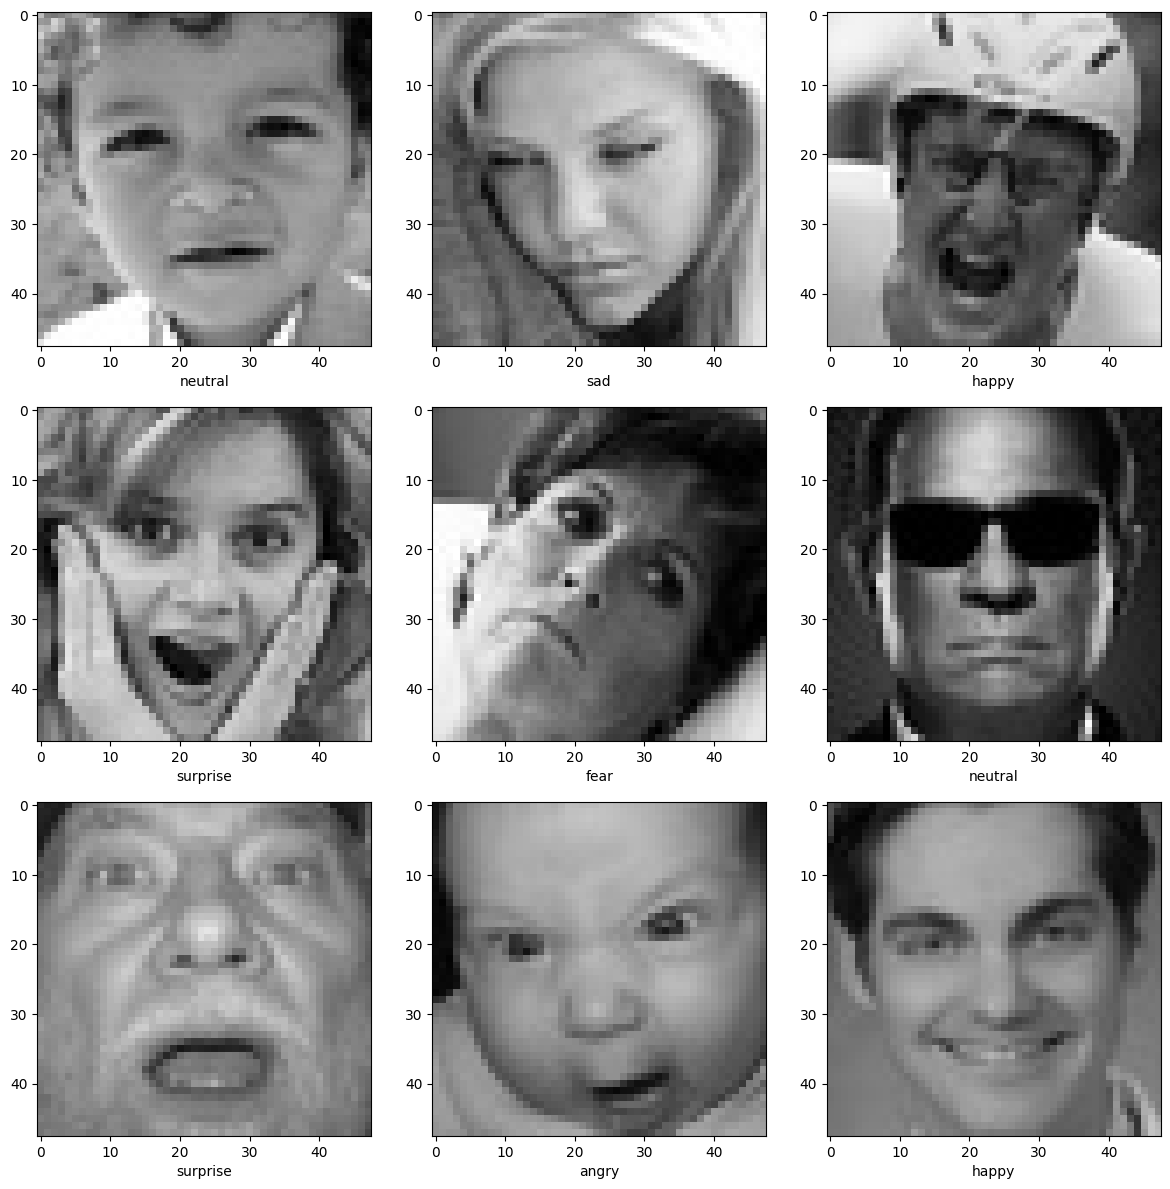

In [5]:
num_total=len(image_file_list)
plt.subplots(3,3, figsize=(12,12))
for i,k in enumerate(np.random.randint(num_total, size=9)):
    im = Image.open(image_file_list[k])
    arr = np.array(im)
    #print(arr.shape)
    plt.subplot(3,3, i+1)
    plt.xlabel(class_names[image_label_list[k]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()
# image size and number of channels differ each other

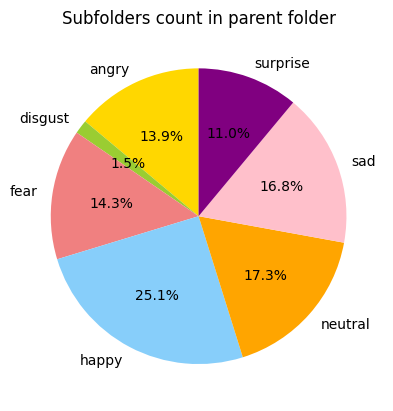

In [6]:
# Get a list of all the subfolders inside the parent folder
subfolders = [f for f in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, f))]

# Count the number of subfolders and store it in a dictionary
subfolders_count = {}
for subfolder in subfolders:
    subfolder_path = os.path.join(train_data_dir, subfolder)
    subfolders_count[subfolder] = len(os.listdir(subfolder_path))

# Create a pie chart to visualize the subfolders count
labels = subfolders_count.keys()
sizes = subfolders_count.values()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'purple', 'gray']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set the title for the chart
ax1.set_title("Subfolders count in parent folder")

# Show the chart
plt.show()

In [7]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(48, 48),
                    batch_size=32,
                    class_mode='categorical',
                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            color_mode='grayscale',
                            target_size=(48, 48),
                            batch_size=32,
                            class_mode='categorical',
                            shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [11]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [13]:
train_path = "data/train/"
test_path = "data/test"

In [14]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [15]:
num_train_imgs

28709

In [16]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [17]:
num_test_imgs

7178

In [23]:
epochs=100
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32)


Epoch 1/100
897/897 [==============================] - 21s 24ms/step - loss: 0.9944 - accuracy: 0.6264 - val_loss: 1.0488 - val_accuracy: 0.6194
Epoch 2/100
897/897 [==============================] - 21s 23ms/step - loss: 0.9986 - accuracy: 0.6239 - val_loss: 1.0703 - val_accuracy: 0.6151
Epoch 3/100
897/897 [==============================] - 21s 23ms/step - loss: 0.9994 - accuracy: 0.6263 - val_loss: 1.0622 - val_accuracy: 0.6191
Epoch 4/100
897/897 [==============================] - 21s 23ms/step - loss: 1.0019 - accuracy: 0.6229 - val_loss: 1.0425 - val_accuracy: 0.6150
Epoch 5/100
897/897 [==============================] - 21s 23ms/step - loss: 0.9951 - accuracy: 0.6221 - val_loss: 1.0345 - val_accuracy: 0.6217
Epoch 6/100
897/897 [==============================] - 21s 24ms/step - loss: 0.9987 - accuracy: 0.6235 - val_loss: 1.0478 - val_accuracy: 0.6148
Epoch 7/100
897/897 [==============================] - 21s 24ms/step - loss: 0.9953 - accuracy: 0.6239 - val_loss: 1.0372 - val_ac

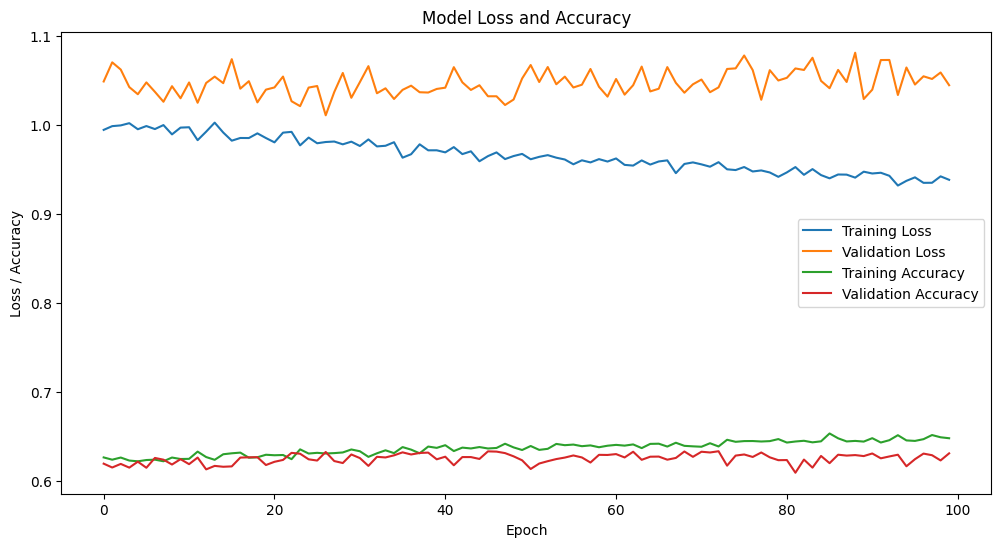

In [24]:
import matplotlib.pyplot as plt
# Plot the loss and accuracy curves for training and validation sets
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


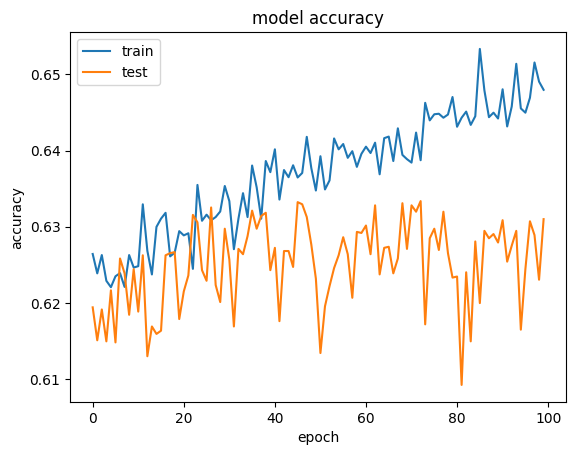

In [25]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

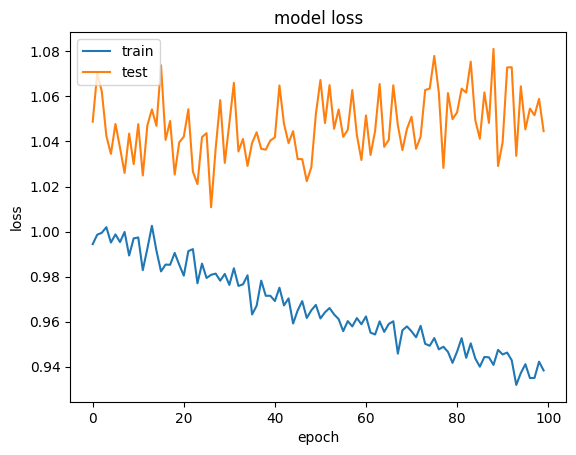

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model.save('model_file.h5')